In [1]:
import pandas as pd
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

2024-09-20 10:51:21.582484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 10:51:21.780114: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 10:51:21.835143: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 10:51:22.168190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-20 10:51:23.622122: W tensorflow/compiler/tf2

In [14]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [15]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)

In [83]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy'
)

In [84]:
model.fit(X_test_flatten, y_test, epochs=15)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7587 - loss: 0.8856
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9233 - loss: 0.2647
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9458 - loss: 0.1846
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9596 - loss: 0.1466
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1126
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0905
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9814 - loss: 0.0747
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0518
Epoch 9/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0455
Epoch 10/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0368
Epoch 11/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0260
Epoch 12/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [85]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9983 - loss: 0.0132


[0.01141082588583231, 0.9984999895095825]

In [86]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


array([3.47227380e-02, 6.65282714e-05, 1.86746255e-01, 9.92033601e-01,
       1.28521435e-07, 1.51399116e-03, 1.13186566e-07, 9.99998152e-01,
       2.81286356e-03, 4.99676494e-03], dtype=float32)

In [87]:
import numpy as np
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [88]:
cm = tensorflow.math.confusion_matrix(y_test, y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    9,    0,  882,    0,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    2,    0,    0,    0,    0,    0,    0,  972,    0],
       [   0,    1,    0,    0,    1,    0,    0,    0,    1, 1006]],
      dtype=int32)>

<Axes: >

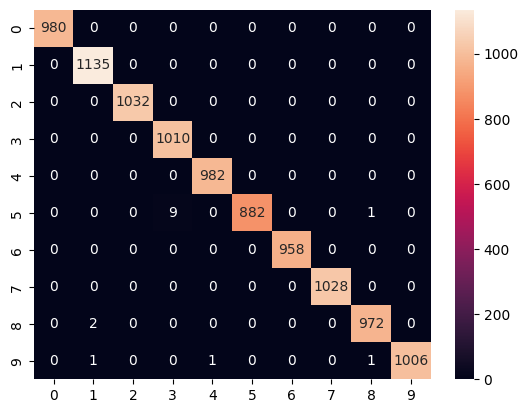

In [89]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')